<a href="https://colab.research.google.com/github/kangdoung/Traffic_detection/blob/main/train_effidet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set up environment

In [ ]:
! git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git

Cloning into 'Monk_Object_Detection'...
remote: Enumerating objects: 106, done.
remote: Counting objects: 100% (106/106), done.
remote: Compressing objects: 100% (82/82), done.
remote: Total 10515 (delta 54), reused 46 (delta 24), pack-reused 10409
Receiving objects: 100% (10515/10515), 261.82 MiB | 35.44 MiB/s, done.
Resolving deltas: 100% (4667/4667), done.
Checking out files: 100% (8428/8428), done.


In [ ]:
# For colab use the command below
! cd /content/Monk_Object_Detection/4_efficientdet/installation && cat requirements_colab.txt | xargs -n 1 -L 1 pip install

# For Local systems and cloud select the right CUDA version
#! cd Monk_Object_Detection/inference_engine/installation && cat requirements_cuda.txt | xargs -n 1 -L 1 pip install

  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.6.3-cp36-none-any.whl size=12421 sha256=6630e3e86174a70b0ef7eb696ee4dc5d48847a03167397db39e4b54250c66b7f
  Stored in directory: /root/.cache/pip/wheels/42/1e/a9/2a578ba9ad04e776e80bf0f70d8a7f4c29ec0718b92d8f6ccd
Successfully built efficientnet-pytorch
     |████████████████████████████████| 317kB 23.7MB/s 
  Created wheel for dicttoxml: filename=dicttoxml-1.7.4-cp36-none-any.whl size=17453 sha256=92163499966ccf94f62cb85d0bd568360547741398f218f97bc665ebc1634ca6
  Stored in directory: /root/.cache/pip/wheels/62/4f/a3/afd4a68f5add45a668c14efa53b64d5cffb2be6bacf993c151
Successfully built dicttoxml
     |████████████████████████████████| 4.0MB 16.4MB/s 
     |████████████████████████████████| 753.4MB 22kB/s 
  Found existing installation: torch 1.7.0+cu101
    Uninstalling torch-1.7.0+cu101:
      Successfully uninstalled torch-1.7.0+cu101
  Found existing installation: torchvision 0.8.1+cu101
    Uninstalling torchvi

# Lấy dữ liệu đã được gán nhãn lại.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!apt-get install rar

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  rar
0 upgraded, 1 newly installed, 0 to remove and 12 not upgraded.
Need to get 295 kB of archives.
After this operation, 799 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/multiverse amd64 rar amd64 2:5.5.0-1 [295 kB]
Fetched 295 kB in 1s (326 kB/s)
Selecting previously unselected package rar.
(Reading database ... 144786 files and directories currently installed.)
Preparing to unpack .../rar_2%3a5.5.0-1_amd64.deb ...
Unpacking rar (2:5.5.0-1) ...
Setting up rar (2:5.5.0-1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [ ]:
!cp '/content/drive/My Drive/HCMAI/Dataset/C10Dataset.rar' dataset.rar

In [ ]:
!unrar x /content/dataset.rar


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/dataset.rar

Creating    C10Dataset                                                OK
Creating    C10Dataset/annotations                                    OK
Extracting  C10Dataset/annotations/instances_Images.json                   0%  OK 
Creating    C10Dataset/Images                                         OK
Extracting  C10Dataset/Images/0006_cam_10.jpg                              0%  OK 
Extracting  C10Dataset/Images/0007_cam_10.jpg                              0%  OK 
Extracting  C10Dataset/Images/0008_cam_10.jpg                              0%  OK 
Extracting  C10Dataset/Images/0009_cam_10.jpg                              0%  OK 
Extracting  C10Dataset/Images/0010_cam_10.jpg                              0%  OK 
Extracting  C10Dataset/Images/0011_cam_10.jpg                              0%  OK 
Extracting  C10Dataset/Images/

# Set up model

In [ ]:
import os
import sys
sys.path.append("Monk_Object_Detection/4_efficientdet/lib/");

In [ ]:
from train_detector import Detector

In [ ]:
gtf = Detector();

In [ ]:
root_dir = "./";
coco_dir = "C10Dataset";
img_dir = "./";
set_dir = "Images";

Đường dẫn đến các folders trong chứa ảnh.

In [ ]:
gtf.Train_Dataset(root_dir, coco_dir, img_dir, set_dir, batch_size=8, image_size=512, use_gpu=True, num_workers=3)

loading annotations into memory...
Done (t=0.06s)
creating index...
index created!


In [ ]:
gtf.Model("efficientnet-b2");

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b2-8bb594d6.pth" to /root/.cache/torch/checkpoints/efficientnet-b2-8bb594d6.pth



Loaded pretrained weights for efficientnet-b2


Train với model efficientdet D2

In [ ]:
gtf.Set_Hyperparams(lr=0.0001, val_interval=1, es_min_delta=0.0, es_patience=0)

In [ ]:
gtf.Train(num_epochs=50, model_output_dir="/content/drive/My Drive/HCMAI/Cam10_trained/");

Monk_Object_Detection/4_efficientdet/lib/src/model.py:297: TracerWarning: Converting a tensor to a Python index might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if len(inputs) == 2:
Monk_Object_Detection/4_efficientdet/lib/src/utils.py:84: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  image_shape = np.array(image_shape)
Monk_Object_Detection/4_efficientdet/lib/src/utils.py:96: TracerWarning: torch.from_numpy results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this fu

Buffered data was truncated after reaching the output size limit.

# Inference 

## Load Model

In [ ]:
import os
import sys
sys.path.append("Monk_Object_Detection/4_efficientdet/lib/");

In [ ]:
from infer_detector import Infer

In [ ]:
gtf = Infer();

In [ ]:
gtf.Model(model_dir="/content/drive/My Drive/HCMAI/Cam10_trained/")

## Label

In [ ]:
class_list = ['Car', 'Truck', 'Motor', 'Bus', 'Bicycle']

In [ ]:
class_list

['Motor', 'Bus', 'Car', 'Truck']

In [ ]:
for i in range(4):
    print(i)
    print(class_list[i])

0
Motor
1
Bus
2
Car
3
Truck


In [ ]:
def convert_label(x):
    if x == 0:
        return 1
    elif x == 1:
        return 3
    elif x == 2:
        return 2
    return 4

## Visualize kết quả predict của model với một số frame ảnh.

In [ ]:
def prt_bbox(image_path, x, y, w, h):
    

    x = int(x)
    y = int(y)
    w = int(w)
    h = int(h)
    
    cv2.rectangle(im,(x,y),(w,h),(0,255,0),2)
    
    return im

Motor
tensor(0, device='cuda:0')
Motor
tensor(0, device='cuda:0')


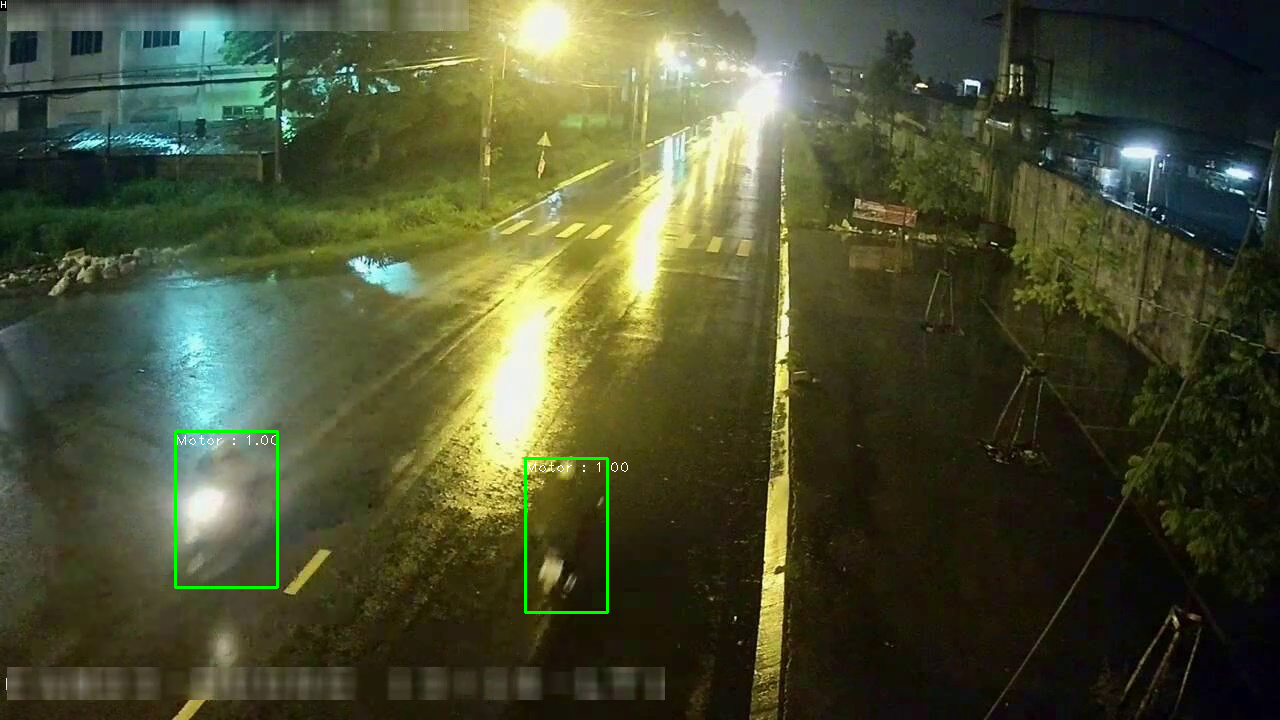

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img_path = '/content/drive/My Drive/HCMAI/frames/Copy of cam_10/5110.jpg'
im = cv2.imread(img_path)
res = gtf.Predict(img_path, class_list, vis_threshold = 0)
if res!=None:
    scores, labels, boxes = res[0], res[1], res[2]
    for box_id in range(boxes.shape[0]):
        pred_prob = float(scores[box_id])
        #print(pred_prob)
        if pred_prob > 0:
            print(class_list[int(labels[box_id])])
            print(labels[box_id])
            x , y, w, h = boxes[box_id][0], boxes[box_id][1], boxes[box_id][2], boxes[box_id][3]
            text_size = cv2.getTextSize(class_list[labels[box_id]] + ' : %.2f' % pred_prob, cv2.FONT_HERSHEY_PLAIN, 1, 1)[0]
            
            cv2.putText(
                            im, class_list[int(labels[box_id])] + ' : %.2f' % pred_prob,
                            (x, y + text_size[1] + 4), cv2.FONT_HERSHEY_PLAIN, 1,
                            (255, 255, 255), 1)
        
            prt_bbox(im, x, y, w, h)
        

cv2_imshow(im)

# Detection


Thực hiện detection cho các video camera và ghi vào file txt cho các bước sau.

In [ ]:
!pip install "tqdm==4.43.0"

     |████████████████████████████████| 61kB 4.8MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [ ]:
cams = ['cam_10']

In [ ]:
import os
!mkdir datasets
for cam_num in cams:
    print('datasets/{}/'.format(cam_num))
    if not os.path.isdir('datasets/{}/'.format(cam_num)):
        !mkdir 'datasets/{cam_num}'
        !cp "/content/drive/My Drive/VietAI - Final Project/New ZIP/{cam_num}.zip" 'datasets/{cam_num}/{cam_num}.zip'
        %cd 'datasets/{cam_num}'
        !unzip -q {cam_num}.zip
        %cd ..
        %cd ..
    else:
        print('_datasets/{} already exist'.format(cam_num))

datasets/cam_10/
/content/datasets/cam_10
/content/datasets
/content


Chuyển dataset từ drive qua disk của colab

In [ ]:
from tqdm import tqdm_notebook

In [ ]:

score_threshold = 0.25
for cam_num in cams:
    image_files = os.listdir('datasets/cam_10'.format(cam_num))

    image_files.sort()
    events = []

    with open('/content/drive/My Drive/HCMAI/cam_10.txt'.format(cam_num), 'w') as fout:
        for i in tqdm_notebook(range(len(image_files))):
            f = image_files[i]
            #img = cv2.imread(os.path.join('datasets/{}'.format(cam_num), f))
            #%%time
            path = '/content/datasets/cam_10/'
            img_path = (path + f );
            res = gtf.Predict(img_path, class_list, vis_threshold = 0) 
            if res == None:
                print(img_path)
            elif res != None:
                scores, labels, boxes = res[0], res[1], res[2]
                    
                for box_id in range(boxes.shape[0]):
                    pred_prob = float(scores[box_id])
                    #print(pred_prob)
                    if pred_prob > 0:

                        x_min, y_min, x_max, y_max = boxes[box_id][0], boxes[box_id][1], boxes[box_id][2], boxes[box_id][3]
                        x_min = int(x_min)
                        y_min = int(y_min)
                        x_max = int(x_max)
                        y_max = int(y_max)
                        label = convert_label(int(labels[box_id]))
                        s = pred_prob
                        fout.write('{} {} {} {} {} {} {}\n'.format(i, x_min, y_min, x_max, y_max, s, label) )          

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # Remove the CWD from sys.path while we load stuff.


Streaming output truncated to the last 5000 lines.
NO Object Detected
/content/datasets/cam_10/0884.jpg
NO Object Detected
/content/datasets/cam_10/0885.jpg
NO Object Detected
/content/datasets/cam_10/0886.jpg
NO Object Detected
/content/datasets/cam_10/0887.jpg
NO Object Detected
/content/datasets/cam_10/0888.jpg
NO Object Detected
/content/datasets/cam_10/0889.jpg
NO Object Detected
/content/datasets/cam_10/0890.jpg
NO Object Detected
/content/datasets/cam_10/0891.jpg
NO Object Detected
/content/datasets/cam_10/0892.jpg
NO Object Detected
/content/datasets/cam_10/0893.jpg
NO Object Detected
/content/datasets/cam_10/0894.jpg
NO Object Detected
/content/datasets/cam_10/0909.jpg
NO Object Detected
/content/datasets/cam_10/0910.jpg
NO Object Detected
/content/datasets/cam_10/0911.jpg
NO Object Detected
/content/datasets/cam_10/0912.jpg
NO Object Detected
/content/datasets/cam_10/0913.jpg
NO Object Detected
/content/datasets/cam_10/0914.jpg
NO Object Detected
/content/datasets/cam_10/0915

error: ignored

Đọc file và ghi vào file txt theo thứ tự: id_frame xmin ymin xmax ymax id_class